__*Accidental Drug Related Deaths 2012 - 2017*__

There is currently an epidemic steamrolling through America in the form of accidental drug related deaths. Moreover, it seems that the biggest concern has to deal with synthetic opioids. According to the CDC (CDC, 2018), “drug overdose data shows that America’s overdose epidemic is spreading geographically and increasing across demographic groups”. This is being done at an exceedingly alarming rate and it seems that with accidental drug overdoses, synthetic opioids seem to be the biggest culprit in regard to the “Accidental Drug Related Deaths” in in America today. 

What I hope to accomplish, from this data, is to see where exactly opioids fall in America’s accidental drug related deaths. To do so, I will have to pose a few analytical questions and use the data presented to answer said questions. 

First, lets determine the set of questions to be asked.

__1)	Are opioids really the leading cause of accidental drug related deaths?__ 

__2)	What ethnicity is more likely to have an accidental drug related death?__

    a.	What is the gender that tends to abuse drugs?
    
    b.	What are the age variances of the individuals more likely to have an accidental drug related death?
    
__3)	Due to the crisis revolving around opioid’s, what is the likelihood someone will have an accidental drug related death regarding opioids in comparison to other deadly narcotics, such as heroin?__


In [94]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
%matplotlib inline

print(os.getcwd())

C:\Users\rjourney\Desktop\Development Jupyter Notes


In [95]:
fname = "Accidental_Drug_Related_Deaths__2012-2017(A).csv"
df = pd.read_csv(fname)

In [96]:
df.head()

,Sex,Race,Age,DescriptionofInjury,ImmediateCauseA,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid
0,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,White,45.0,NaN,Fentanyl Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,White,30.0,NaN,Methadone and Cocaine Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN
3,Male,White,27.0,NaN,Intoxication due to the combined effects of Ox...,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,White,21.0,NaN,Multiple Drug Toxicity,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df.shape
# How large is my dataframe?

(4069, 17)

In [139]:
df.columns
# What are my columns?

Index(['Sex', 'Race', 'Age', 'ImmediateCauseA', 'Heroin', 'Cocaine',
       'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH', 'Hydrocodone',
       'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine (not heroin)', 'Any Opioid'],
      dtype='object')

In [99]:
cols = ['Sex', 'Race', 'Age', 'DescriptionofInjury', 'ImmediateCauseA',
       'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine (not heroin)', 'Other', 'Any Opioid']

In [100]:
for col in cols:
    print('column: {}'.format(col))
    print(type(col))

column: Sex
<class 'str'>
column: Race
<class 'str'>
column: Age
<class 'str'>
column: DescriptionofInjury
<class 'str'>
column: ImmediateCauseA
<class 'str'>
column: Heroin
<class 'str'>
column: Cocaine
<class 'str'>
column: Fentanyl
<class 'str'>
column: Oxycodone
<class 'str'>
column: Oxymorphone
<class 'str'>
column: EtOH
<class 'str'>
column: Hydrocodone
<class 'str'>
column: Benzodiazepine
<class 'str'>
column: Methadone
<class 'str'>
column: Amphet
<class 'str'>
column: Tramad
<class 'str'>
column: Morphine (not heroin)
<class 'str'>
column: Other
<class 'str'>
column: Any Opioid
<class 'str'>


In [144]:
df.isnull().sum().sort_values(ascending = False).head(32)
# The inital check to determine what needed to be removed for the data 
# (Hint: This the after effect of what was already removed)

Any Opioid               0
Oxycodone                0
Race                     0
Age                      0
ImmediateCauseA          0
Heroin                   0
Cocaine                  0
Fentanyl                 0
Oxymorphone              0
Morphine (not heroin)    0
EtOH                     0
Hydrocodone              0
Benzodiazepine           0
Methadone                0
Amphet                   0
Tramad                   0
Sex                      0
dtype: int64

In [145]:
df['Age'].unique()
# To determine if any unique identifiers exits in the "Age Column".

array([45., 30., 27., 21., 25., 67., 32., 61., 37., 59., 22., 38., 40.,
       71., 54., 52., 55., 44., 26., 18., 36., 53., 29., 48., 50., 49.,
       64., 35., 62., 46., 31., 58., 39., 41., 47., 43., 23., 56., 72.,
       28., 60., 24., 51., 57., 73., 42., 70., 34., 20., 33., 63., 69.,
       17., 14., 65., 68., 19., 66., 75., 81., 87., 16.])

In [103]:
for col in cols:
    print(col)
    print(df[col].unique())

# Used to determine any unique identifiers to help clean up the data.

Sex
[nan 'Male' 'Female']
Race
[nan 'White' 'Hispanic, White' 'Black' 'Unknown' 'Asian, Other'
 'Hispanic, Black' 'Other' 'Asian Indian' 'Chinese'
 'Native American, Other' 'Hawaiian']
Age
[nan 45. 30. 27. 21. 25. 67. 32. 61. 37. 59. 22. 38. 40. 71. 54. 52. 55.
 44. 26. 18. 36. 53. 29. 48. 50. 49. 64. 35. 62. 46. 31. 58. 39. 41. 47.
 43. 23. 56. 72. 28. 60. 24. 51. 57. 73. 42. 70. 34. 20. 33. 63. 69. 17.
 14. 65. 68. 19. 66. 75. 81. 87. 16.]
DescriptionofInjury
[nan 'Substance Abuse' 'prescription medicine abuse'
 'Medications and Alcohol' 'substance abuse' 'Drug use' 'drug use'
 'SUBSTANCE ABUSE' 'Ingestion' 'Substance abuse' 'Drug Use'
 'Abuse of Medication' 'Medication abuse' 'Prescription Abuse'
 'substance abuse (injection)' 'Inhalation' 'ALCOHOL MEDICATION ABUSE'
 'alcohol abuse' 'Took Medications' 'Combined Medication Alcohol'
 'substance abuse, injection' 'Ingested medications' 'Took Medication'
 'Recent cocaine use' 'Took Amphetamine' 'Used Medications, Alcohol'
 'Prescription

In [104]:
yes =['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
      'Morphine (not heroin)', 'Any Opioid']

In [118]:
for col in yes:
    df[col].replace('Y', 1, inplace=True)
    df[col].replace('y', 1, inplace=True)
    df[col] = df[col].fillna(0)
    df[col].replace(' ', 0, inplace=True)
    df[col].replace('Y POPS', 0, inplace=True)
    df[col].replace('Y (PTCH)', 0, inplace=True)
    df[col].replace('Y-A', 0, inplace=True)
    df[col].replace('NO RX BUT STRAWS', 0, inplace=True)
    df[col].replace('STOLE MEDS', 0, inplace=True)
    df[col].replace('PCP neg', 0, inplace=True)
    df[col].replace(' Y', 1, inplace=True)
    df[col].replace('N', 0, inplace=True)

In [106]:
df['Cocaine'].head()
# Test to idenitfy any lapses in the clean up

0    0
1    0
2    1
3    0
4    0
Name: Cocaine, dtype: int64

In [107]:
for col in yes:
    print(col)
    print(df[col].unique())

Heroin
[0 1]
Cocaine
[0 1]
Fentanyl
[1 0]
Oxycodone
[0 1]
Oxymorphone
[0 1]
EtOH
[0 1]
Hydrocodone
[1 0]
Benzodiazepine
[1 0]
Methadone
[0 1]
Amphet
[0. 1.]
Tramad
[0. 1.]
Morphine (not heroin)
[0 1]
Any Opioid
[0 1]


In [108]:
for col in yes:
    print(df[col].value_counts())

1    2149
0    1934
Name: Heroin, dtype: int64
0    2909
1    1174
Name: Cocaine, dtype: int64
0    2620
1    1463
Name: Fentanyl, dtype: int64
0    3538
1     545
Name: Oxycodone, dtype: int64
0    3987
1      96
Name: Oxymorphone, dtype: int64
0    3096
1     987
Name: EtOH, dtype: int64
0    3979
1     104
Name: Hydrocodone, dtype: int64
0    3008
1    1075
Name: Benzodiazepine, dtype: int64
0    3698
1     385
Name: Methadone, dtype: int64
0.0    3980
1.0     103
Name: Amphet, dtype: int64
0.0    3993
1.0      90
Name: Tramad, dtype: int64
0    4049
1      34
Name: Morphine (not heroin), dtype: int64
0    3396
1     687
Name: Any Opioid, dtype: int64


*If we look at the data presented above, we can see that the drugs are classified into three categories: Opioids (bear in mind most of the drugs on this list are opioids), Other Opiods, and anything other than that. So, this data prepares us to answer the question:*

__1) Are opioids really the leading cause of accidental drug related deaths?__
    *Clearly, based on the data presented, we can see that with __ALL__ opioids combined, that they truly are an epidemic causing damage to America. Now that we have this information, there can be a plethora of data that can be researched into this category.*

In [143]:
df.isnull().sum().sort_values(ascending = False).head(32)

Any Opioid               0
Oxycodone                0
Race                     0
Age                      0
ImmediateCauseA          0
Heroin                   0
Cocaine                  0
Fentanyl                 0
Oxymorphone              0
Morphine (not heroin)    0
EtOH                     0
Hydrocodone              0
Benzodiazepine           0
Methadone                0
Amphet                   0
Tramad                   0
Sex                      0
dtype: int64

In [110]:
df = df.drop('Other', 1)
df = df.drop('DescriptionofInjury', 1)

# Dropped data that was not necessary to answer questions

In [111]:
df.head()

,Sex,Race,Age,ImmediateCauseA,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Any Opioid
0,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",0,0,1,0,0,0,1,1,0,0.0,0.0,0,0
1,Male,White,45.0,Fentanyl Intoxication,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0
2,Male,White,30.0,Methadone and Cocaine Intoxication,0,1,0,0,0,0,0,0,1,0.0,0.0,0,0
3,Male,White,27.0,Intoxication due to the combined effects of Ox...,0,0,0,1,1,0,0,0,0,0.0,0.0,0,0
4,Male,White,21.0,Multiple Drug Toxicity,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0


In [116]:
df = df.dropna()

In [117]:
df.isnull().sum().sort_values(ascending = False).head(32)

Any Opioid               0
Oxycodone                0
Race                     0
Age                      0
ImmediateCauseA          0
Heroin                   0
Cocaine                  0
Fentanyl                 0
Oxymorphone              0
Morphine (not heroin)    0
EtOH                     0
Hydrocodone              0
Benzodiazepine           0
Methadone                0
Amphet                   0
Tramad                   0
Sex                      0
dtype: int64

In [121]:
df.describe()

,Age,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Any Opioid
count,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000
mean,41.732367,0.527157,0.287540,0.358565,0.133448,0.023347,0.241828,0.025068,0.263210,0.094372,0.025313,0.022118,0.008356,0.168592
std,12.310706,0.499323,0.452671,0.479638,0.340100,0.151022,0.428244,0.156350,0.440429,0.292382,0.157094,0.147087,0.091039,0.374437
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df["Race"].value_counts()

White                     3243
Hispanic, White            430
Black                      329
Hispanic, Black             17
Unknown                     16
Asian, Other                14
Asian Indian                 9
Other                        7
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

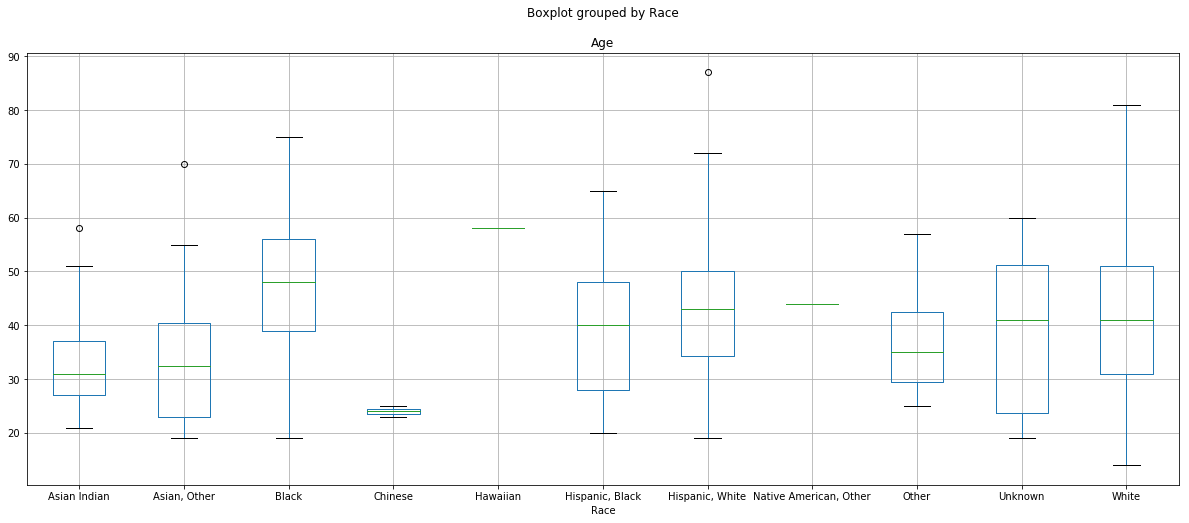

In [127]:
df.boxplot(column = 'Age', by = "Race", figsize = (20,8))

<BarContainer object of 1 artists>

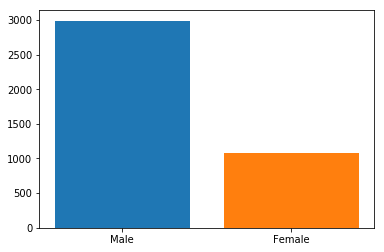

In [136]:
plt.bar('Male',len(df[df['Sex'] == 'Male']))
plt.bar('Female',len(df[df['Sex'] == 'Female']))

In [132]:
df['Sex'].value_counts()

Male      2988
Female    1081
Name: Sex, dtype: int64

__2) What ethnicity is more likely to have an accidental drug related death?__

    a.    What is the gender that tends to abuse drugs?

    b.    What are the age variances of the individuals more likely to have an accidental drug related death?
    
*Based on the data provided, we can see the largest ethnicity is an "unknown" factor. Since there is nothing that can be derived from this, we must toss that information out and move on to the next set.*

*What we see is that the two ethnicities that tend to have accidental drug related deaths would be: White & Black/Hispanic. the interesting part of all this data is that there is no single race that is immune to the effects of abusing drugs. Furthermore, the majority of the races are so closely related statistically in deaths that it can be assumed that one races is __Significantly__ more likley to abuse narcotics.*

*The biggest surprise and the most interesting part of all of this, is the gender gap. Males have almost tripled in death rates in comparison to females.*

*What we can also derive from this information is that the age range more likely to have an accidental drug realted accident is between the ages of 30-50. Specifcally speaking, the median age of __41.7 (42)__. To further dissect this information, we know the youngest person to have an accidental drug related death __(14)__, the oldest __(87)__ and the median age __(41.7)__.*

*What we have found thus far, is that males of the age of 42 (more than likely white or black/hispanic) will tend to have an accidental drug related death.*

*So, now we have a set of data that we can derive our answers from to determine the following:*

__3)	Due to the crisis revolving around opioid’s, what is the likelihood someone will have an accidental drug related death regarding opioids in comparison to other deadly narcotics, such as heroin?__

*Based on everything that is presented and dissected from the data, we can determine that the likelihood of having an accidental drug related death compared to any other is significantly higher. Furthermore, with everything being looked into, we have determined that opioid's are the leading cause of accidental drug related deaths along with the specific age group, gender, and race.*

Based on the information derived from this dataset, I would like to see more research as to what opioid is being abused the most and in what capacity? Are the opioids being bought and abused illegally or are they being prescribed? Depending on the data derived from these answers, I would anticipate more questions be asked to allow us to further delve deeper into this issue. Perhaps there might be some clarity to be gained from digging into all of the information discovered. 

__References__

CDC (2018). U.S. Drug overdose deaths continue to rise; increase fueled by synthetic opioids.  Retrieved from https://www.cdc.gov/media/releases/2018/p0329-drug-overdose-deaths.html